In [15]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# print(tf.__version__)

# import numpy as np
# import matplotlib.pyplot as plt

In [16]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)
# img_width = 64
# img_height = 64

In [17]:
# train_data_generator = datagen.flow_from_directory(directory='Water_CNN_data',
#                                                    target_size = (img_width, img_height),
#                                                    class_mode = 'binary',
#                                                    batch_size = 16,
#                                                    subset = 'training'
#                                                    )
# validation_data_generator = datagen.flow_from_directory(directory='Water_CNN_data',
#                                                    target_size = (img_width, img_height),
#                                                    class_mode = 'binary',
#                                                    batch_size = 16,
#                                                    subset = 'validation'
#                                                    )

In [18]:
# train_data_generator.labels

In [19]:
# model = Sequential()

# model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='softmax'))

In [20]:
# model.summary()

In [21]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [22]:
# history = model.fit_generator(generator=train_data_generator,
#                               steps_per_epoch = len(train_data_generator),
#                               epochs = 5,
#                               validation_data = validation_data_generator,
#                               validation_steps = len(validation_data_generator))

In [47]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [48]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Water_CNN_data/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Found 261 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Epoch 1/5
9/9 [==============================] - 353s 39s/step - loss: 0.8822 - accuracy: 0.5977 - val_loss: 1.1380 - val_accuracy: 0.5000
Epoch 2/5
9/9 [==============================] - 343s 38s/step - loss: 0.5187 - accuracy: 0.7471 - val_loss: 0.7402 - val_accuracy: 0.6000
Epoch 3/5
9/9 [==============================] - 330s 37s/step - loss: 0.2080 - accuracy: 0.9080 - val_loss: 1.3929 - val_accuracy: 0.4364
Epoch 4/5
9/9 [==============================] - 595s 66s/step - loss: 0.1524 - accuracy: 0.9387 - val_loss: 0.7927 - val_accuracy: 0.6545
Epoch 5/5
9/9 [==============================] - 340s 38s/step - loss: 0.0854 - accuracy: 0.9808 - val_loss: 0.6021 - val_accuracy: 0.7364


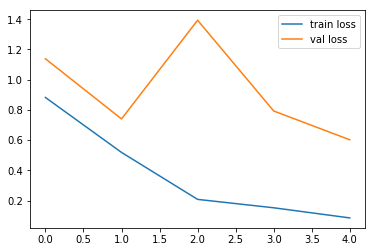

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [49]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)

train_data = datagen.flow_from_directory(directory='Water_CNN_data',
                                                   target_size = (224, 224),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   subset = 'training'
                                                   )
validation_data = datagen.flow_from_directory(directory='Water_CNN_data',
                                                   target_size = (224, 224),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   subset = 'validation'
                                                   )

# fit the model
r = model.fit_generator(
  train_data,
  validation_data=validation_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(validation_data)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

import tensorflow as tf

from keras.models import load_model

model.save('water_cnn.h5')

In [ ]:
print(len(train_data))

In [43]:
print(len(validation_data))

7
